In [1]:
import sys
import os

# Add the project root to the system path

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

sys.path.append(project_root)


In [2]:
# 📌 Step 1: Imports
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, 
    roc_curve, 
    confusion_matrix, 
    classification_report, 
    ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split

# Import your own preprocessing function
from models.feature_engineering import preprocess


In [3]:
# 📌 Step 2: Load and preprocess data
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"

# Use only a portion for faster notebook analysis
df = pd.read_csv(url, nrows=85442)
X, y = preprocess(df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [4]:
# 📌 Step 3: Load trained models
logreg = joblib.load("C:/Users/segev/code_notebooks/fraud_ml_project/models/logistic_regression.joblib")
rf = joblib.load("C:/Users/segev/code_notebooks/fraud_ml_project/models/random_forest.joblib")


In [5]:
# 📌 Step 4: Predict probabilities
logreg_probs = logreg.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
ensemble_probs = (logreg_probs + rf_probs) / 2

# Binary predictions
logreg_preds = (logreg_probs >= 0.5).astype(int)
rf_preds = (rf_probs >= 0.5).astype(int)
ensemble_preds = (ensemble_probs >= 0.5).astype(int)


In [6]:
# 📌 Step 5: Evaluation function
def evaluate_model(name, y_true, probs, preds):
    print(f"🔍 {name}")
    print(f"ROC AUC: {roc_auc_score(y_true, probs):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, preds))
    print("Classification Report:")
    print(classification_report(y_true, preds, zero_division=0))
    print("-" * 60)


In [7]:
# 📌 Step 6: Evaluate each model
evaluate_model("Logistic Regression", y_test, logreg_probs, logreg_preds)
evaluate_model("Random Forest", y_test, rf_probs, rf_preds)
evaluate_model("Ensemble", y_test, ensemble_probs, ensemble_preds)


🔍 Logistic Regression
ROC AUC: 0.9719
Confusion Matrix:
[[16813   235]
 [    4    37]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17048
           1       0.14      0.90      0.24        41

    accuracy                           0.99     17089
   macro avg       0.57      0.94      0.61     17089
weighted avg       1.00      0.99      0.99     17089

------------------------------------------------------------
🔍 Random Forest
ROC AUC: 0.9875
Confusion Matrix:
[[17047     1]
 [    4    37]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17048
           1       0.97      0.90      0.94        41

    accuracy                           1.00     17089
   macro avg       0.99      0.95      0.97     17089
weighted avg       1.00      1.00      1.00     17089

------------------------------------------------------------
🔍 Ensemble

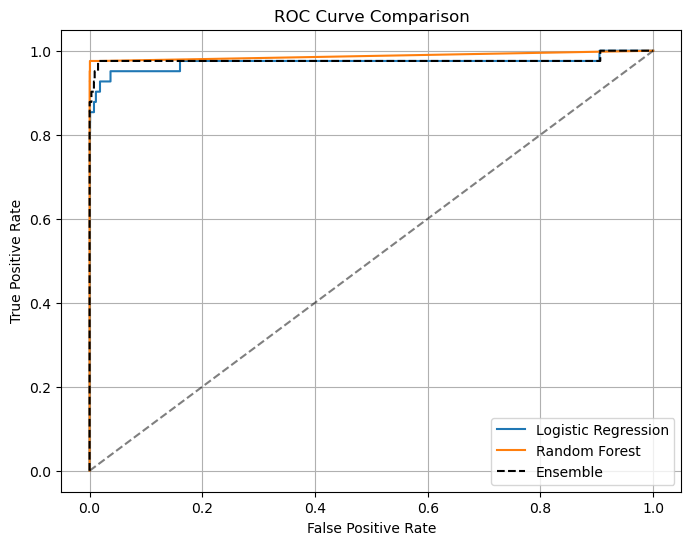

In [8]:
# 📌 Step 7: ROC Curve Comparison
fpr_log, tpr_log, _ = roc_curve(y_test, logreg_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_ens, tpr_ens, _ = roc_curve(y_test, ensemble_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_ens, tpr_ens, label='Ensemble', linestyle='--', color='black')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


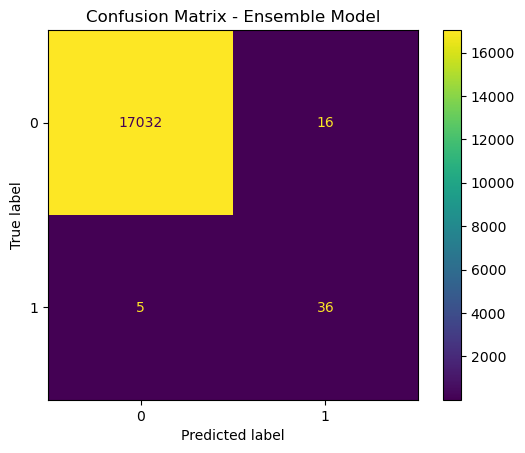

In [9]:
# 📌 Step 8: Confusion Matrix Display (Ensemble)
ConfusionMatrixDisplay.from_predictions(y_test, ensemble_preds)
plt.title("Confusion Matrix - Ensemble Model")
plt.grid(False)
plt.show()
